<a href="https://colab.research.google.com/github/m1key/raspberry-pi/blob/master/humidity/Humidity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

url = 'https://raw.githubusercontent.com/m1key/raspberry-pi/master/humidity/humidity.csv'
df = pd.read_csv(url, sep=",", names=['datetime', 'humidity', 'temperature'])
df = df[df.humidity < 100]
df = df[df.humidity > 0]

df['datetime'] = pd.to_datetime(df['datetime'])
df = df.set_index('datetime')
df = df.groupby(pd.Grouper(freq="5min")).mean()
df = df.reset_index()
df['healthy_min'] = 30
df['healthy_max'] = 50
df.shape
df.iloc[[0, -1]]


,datetime,humidity,temperature,healthy_min,healthy_max
0,2020-04-01 18:05:00,39.043478,23.247826,30,50
1644,2020-04-07 11:05:00,37.000000,25.533333,30,50


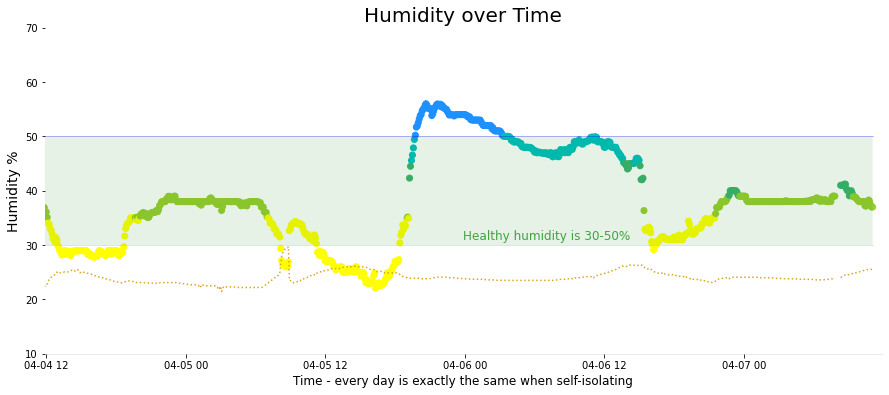

In [13]:
import matplotlib.pyplot as plt

import numpy as np
colors = np.where(df["humidity"] > 50, 'dodgerblue', 
         (np.where(df["humidity"] > 45, 'c',
                   (np.where(df["humidity"] > 39, 'mediumseagreen',
                       (np.where(df['humidity'] > 35, 'yellowgreen', 'yellow')))))))

fig, ax = plt.subplots(1, figsize=(15,6))
ax.scatter(df['datetime'], df['humidity'], c=colors)
ax.plot(df['datetime'], df['temperature'], linestyle='dotted', color='goldenrod')
ax.plot(df['datetime'], df['healthy_min'], linestyle='solid', color="y", linewidth=0.6, label="min healthy humidity", alpha=0.5)
ax.plot(df['datetime'], df['healthy_max'], linestyle='solid', color="b", linewidth=0.6, label="max healthy humidity", alpha=0.5)

plt.title('Humidity over Time', fontsize=20)
plt.xlabel('Time - every day is exactly the same when self-isolating', fontsize=12)
plt.ylabel('Humidity %', fontsize=14)
plt.ylim(10, 70)
import datetime
from datetime import timedelta
plt.xlim(datetime.datetime.now() - timedelta(hours=24*3), datetime.datetime.now())

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_alpha(0.0)
ax.spines['bottom'].set_alpha(0.1)

plt.fill_between(df['datetime'].values, df['healthy_min'], df['healthy_max'],
                where=df['healthy_max'] >= df['healthy_min'],
                facecolor='green', alpha=0.1)

ax.text(0.7, 0.34, 'Healthy humidity is 30-50%',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes,
        color='green', fontsize=12, alpha=0.7)

plt.show()